In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
choosen_index = [2, 3, 9, 11, 12, 13, 16, 17, 19, 27, 29, 31, 32, 37, 39, 45, 48, 49, 50, 56, 59, 61, 62, 63, 67]
print("Choosen index is:", choosen_index)

Choosen index is: [2, 3, 9, 11, 12, 13, 16, 17, 19, 27, 29, 31, 32, 37, 39, 45, 48, 49, 50, 56, 59, 61, 62, 63, 67]


In [3]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in choosen_index:
    dir = os.listdir('PIE'+'/'+ str(i))
    Xi = []
    yi = []
    for idx in dir:
        img = np.array(Image.open('PIE'+'/'+ str(i) +'/'+ idx)) / 256
        Xi.extend(img.reshape(-1, 1024))
        yi.append(i)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3 )
    X_train.extend(Xi_train)
    X_test.extend(Xi_test)
    y_train.extend(yi_train)
    y_test.extend(yi_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)

(2975, 1024)


In [4]:
Xm_train = []
Xm_test = []
ym_train = []
ym_test = []

# Set my photo label=0
dir = os.listdir('MYSELF')
Xi = []
yi = []
for idx in dir:
    img = np.array(Image.open('MYSELF'+'/'+ idx)) / 256
    Xi.extend(img.reshape(-1, 1024))
    yi.append(0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xi, yi, test_size=0.3, shuffle=False)
Xm_train = np.array(Xm_train)
Xm_test = np.array(Xm_test)
ym_train = np.array(ym_train)
ym_test = np.array(ym_test)
print(Xm_train.shape)

(7, 1024)


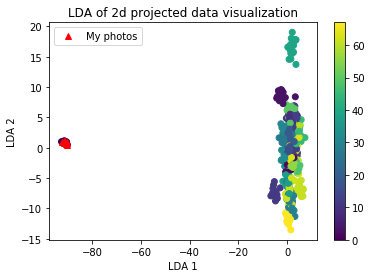

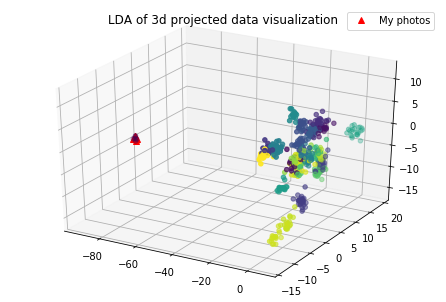

In [5]:
np.random.seed(0)
rand_index = np.random.choice(len(X_train), 500, replace=False)
X_vis = X_train[rand_index]
X_vis = np.concatenate((X_vis, Xm_train), axis=0)
y_vis = y_train[rand_index]
y_vis = np.concatenate((y_vis, ym_train), axis=0)

lda2 = LinearDiscriminantAnalysis(n_components=2)
X_new = lda2.fit_transform(X_vis, y_vis)
plt.scatter(X_new[:,0], X_new[:,1], c=y_vis)
plt.plot(X_new[y_vis==0][:, 0], X_new[y_vis==0][:, 1], 'r^', label='My photos')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar()
plt.title('LDA of 2d projected data visualization')
plt.legend()
plt.show()

lda3 = LinearDiscriminantAnalysis(n_components=3)
X_new = lda3.fit_transform(X_vis, y_vis)
ax = Axes3D(plt.figure())
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c=y_vis)
ax.plot(X_new[y_vis==0][:, 0], X_new[y_vis==0][:, 1], X_new[y_vis==0][:, 2], 'r^',label='My photos')
plt.title('LDA of 3d projected data visualization')
plt.legend()
plt.show()

In [6]:
X_train_all = np.concatenate((X_train, Xm_train), axis=0)
X_test_all = np.concatenate((X_test, Xm_test), axis=0)
y_train_all = np.concatenate((y_train, ym_train), axis=0)
y_test_all = np.concatenate((y_test, ym_test), axis=0)


for i in [2, 3, 9]:
    lda = LinearDiscriminantAnalysis(n_components=i)
    lda.fit(X_train_all, y_train_all)
    X_all_new = lda.transform(X_train_all)
    X_test_new = lda.transform(X_test)
    Xm_test_new = lda.transform(Xm_test)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_all_new, y_train_all)
    acc_cmu = accuracy_score(y_test, knn.predict(X_test_new))
    acc_my = accuracy_score(ym_test, knn.predict(Xm_test_new))
    print("Classification accuracy for LDA",i,"on CMU PIE test images: {:.2f}%, on my photos: {:.2f}%".format(100*acc_cmu, 100*acc_my))

Classification accuracy for LDA 2 on CMU PIE test images: 32.47%, on my photos: 100.00%
Classification accuracy for LDA 3 on CMU PIE test images: 53.18%, on my photos: 100.00%
Classification accuracy for LDA 9 on CMU PIE test images: 92.00%, on my photos: 100.00%
